# Welcome to the Dsc final task phase submission

# Contents:-
### 1.Problem Statement
### 2.Data processing
### 3. Eda
### 4.Models
### 5.Result

# 1.Problem Statement :-
## A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. The product being sold is a term deposit (Fixed Deposit). 

## 2.Data Preprocessing :- 

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
dt = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# View the first 5 rows in the dataset
dt.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

## Cleaning the dataset

In [5]:
#Dropping the Contact column
dt1 = dt.drop('contact', axis=1)
#Removing the 'unknown' variables so that the number of variables are reduced to a minimum.
dt1[['job','education']] = dt1[['job','education']].replace(['unknown'],'other')
condition = dt1.poutcome == 'other'
dt1 = dt1.drop(dt1[condition].index, axis = 0, inplace = False)

In [6]:
#Converting the seconds to minutes for the duration column
dt1['duration'] = dt1['duration'].apply(lambda n:n/60).round(2)


In [7]:
#changing yes to 1 and no to 0
dt1['y'].replace(to_replace='Yes', value=1, inplace=True)
dt1['y'].replace(to_replace='No',  value=0, inplace=True)
dt_dummy=pd.get_dummies(dt1)
dt_dummy.head()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,0,56,4.35,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
1,1,57,2.48,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
2,2,37,3.77,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
3,4,56,5.12,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0
4,5,45,3.30,1,999,0,1.1,93.994,-36.4,4.857,...,0,1,0,0,0,0,1,0,1,0


# EDA

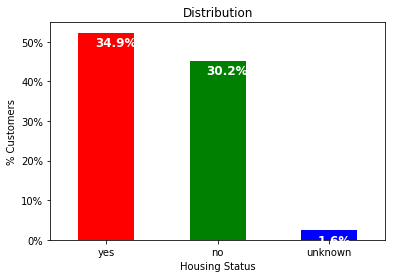

In [8]:

#Housing Status: Exploring the housing status of the customers
colors = ['Red','Green','Blue']
ax = (dt1['housing'].value_counts()*100.0 /len(dt1)).plot(kind='bar',stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Housing Status')
ax.set_ylabel('% Customers')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white',weight = 'bold')

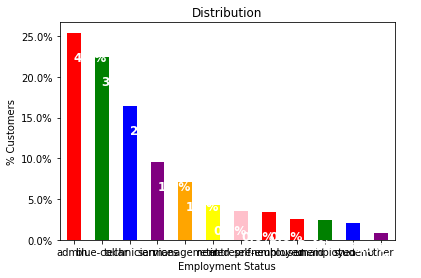

In [9]:

#Employment Status: Exploring the employment status of the customers
colors = ['Red','Green','Blue','Purple','Orange','Yellow','Pink']
ax = (dt1['job'].value_counts()*100.0 /len(dt1)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Employment Status')
ax.set_ylabel('% Customers')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.25, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%',fontsize=12, color='white', weight = 'bold')

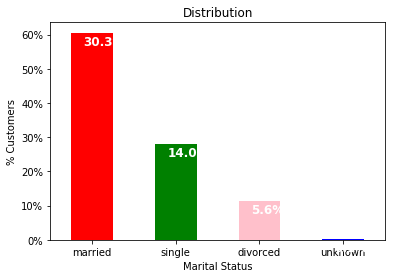

In [10]:
#Marital Status: Exploring the marital status of the customers
colors = ['Red','Green','Pink','Blue']
ax = (dt1['marital'].value_counts()*100.0 /len(dt1)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Marital Status')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white', weight = 'bold')

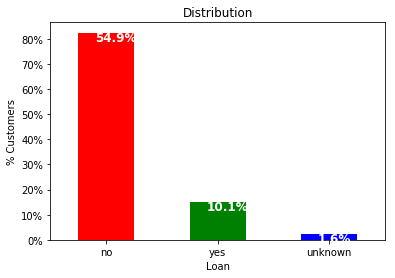

In [11]:
#Lastly, we explore the amount of customers that had a loan at the time they were contacted. 
colors = ['Red','Green','Blue']
ax = (dt1['loan'].value_counts()*100.0 /len(dt)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Loan')
ax.set_title('Distribution')

#create a list to collect the plt.patches data
totals = []

#find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

#set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    #get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, str(round((i.get_height()/total), 1))+'%',fontsize=12,color='white',weight = 'bold')

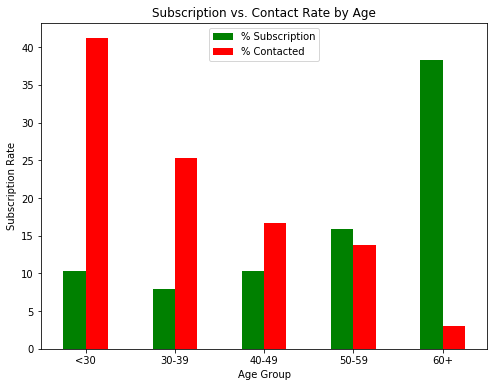

In [12]:
#Relationship between age and subscriptions
lst = [dt1]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
count_age_response_pct = pd.crosstab(dt1['y'],dt1['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(dt1['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
plot_age = age[['% Subscription','% Contacted']].plot(kind = 'bar',
                                              figsize=(8,6), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()

Thus, we observe that the maximum subscribers are over 60 years old. Quite a lot of people under 30 also seem to have subscribed. From this, it seems obvious that the marketing campaign should no longer spend resources targeting the middle-aged customers and instead, focus on the elderly (primarily) and then on the young customers

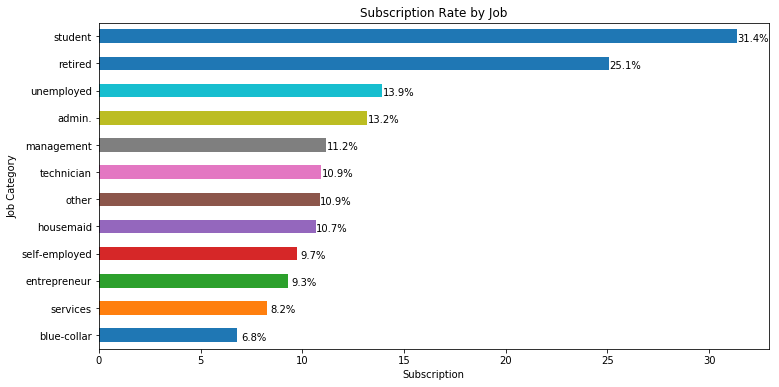

In [13]:

#Relation between employment status and subscriptions
count_job=pd.crosstab(dt1['y'],dt1['job']).apply(lambda x: x/x.sum() * 100)
count_job=count_job.transpose()
plot_job = count_job['yes'].sort_values(ascending = True).plot(kind ='barh', figsize = (12,6))                                                                             
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription')
plt.ylabel('Job Category')
#Labels
for rec, label in zip(plot_job.patches,count_job['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center', va='bottom')

 Again, it is observed that students (below 30) and retired people (around or above 60 years old) are the categories with the highest subscription rate.

# MODELLING:-

##  I decided to use Logistic Regression as the output was binary

In [14]:
#Here, we don't consider the id as it doesn't act as a predictor
dt2 = dt1.iloc[:, 1:7]
dt2.head()

,age,job,marital,education,default,housing
0,56,housemaid,married,basic.4y,no,no
1,57,services,married,high.school,unknown,no
2,37,services,married,high.school,no,yes
3,56,services,married,high.school,no,no
4,45,services,married,basic.9y,unknown,no


The above dataframe (dt2) now contains only those features which were found essential during exploratory data analysis.

In [15]:

#Now, we turn all entries in this concise dataframe into binary values 
dt3=pd.get_dummies(dt2, columns=['job'])
dt3=pd.get_dummies(dt3, columns=['education'])
dt3['housing']=dt3['housing'].map({'yes': 1, 'no': 0})
dt3['default']=dt3['default'].map({'yes': 1, 'no': 0})
dt_response= pd.DataFrame(dt['y'])
dt3= pd.merge(dt3, dt_response, left_index = True, right_index = True)
dt3=dt3.dropna()
del dt3['marital']
dt3.head()

,age,default,housing,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,...,job_unemployed,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_other,education_professional.course,education_university.degree,y
0,56,0.0,0.0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,no
2,37,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no
3,56,0.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no
6,24,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,no
7,25,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,no


In [16]:
from sklearn.linear_model import LogisticRegression

In [27]:
#Feature Selection
array = dt3.values
X = array[:,0:-1]
Y = array[:,-1]


In [35]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
test_size= 0.20
seed = 7
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)
LR=LogisticRegression()
LR.fit(X_train, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [6389, 25439]

In [29]:
#Accuracy:
predictions = LR.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.8713312368972747


In [30]:
#FSCORE:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

         no       0.87      1.00      0.93      6650
        yes       0.00      0.00      0.00       982

avg / total       0.76      0.87      0.81      7632



C:\Users\klakh\Anaconda3\goong\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### we observe acc = 87.2% and fscore is 0.93 using the LR model

# Performing Logistic Regression on the given Test set

In [31]:
test1 = test.iloc[:, 1:8]
test1.head()

,age,job,marital,education,default,housing,loan
0,40,admin.,married,basic.6y,no,no,no
1,59,admin.,married,professional.course,no,no,no
2,41,blue-collar,married,unknown,unknown,no,no
3,25,services,single,high.school,no,yes,no
4,57,housemaid,divorced,basic.4y,no,yes,no


In [32]:
#Now, we turn all entries in this concise dataframe into binary values 
test2=pd.get_dummies(test1, columns=['job'])
test2=pd.get_dummies(test2, columns=['education'])
test2['housing']=test2['housing'].map({'yes': 1, 'no': 0})
test2['default']=test2['default'].map({'yes': 1, 'no': 0})
test2['loan']=test2['loan'].map({'yes': 1, 'no': 0})
test2=test2.dropna()
del test2['marital']
del test2['loan']
test2.head()

,age,default,housing,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,40,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,59,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,25,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,57,0.0,1.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,35,0.0,1.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [33]:
#Feature Selection
array1 = test2.values
X = array1[:]
X1_test=array1

predictions_test = LR.predict(X1_test)

In [34]:
#CREATING A DATAFRAME OF THE RESULTS TO USE IT IN A CSV LATER-submission purposes only
res_dt=pd.DataFrame(predictions_test)
res_dt.insert(0, "id", test.id, True) 
res_dt.head()
res_dt.to_csv("Results4.csv",index=False)